In [65]:
# Import necessary libraries
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = [
    "ID", "Diagnosis", "Radius_mean", "Texture_mean", "Perimeter_mean", "Area_mean",
    "Smoothness_mean", "Compactness_mean", "Concavity_mean", "Concave_points_mean",
    "Symmetry_mean", "Fractal_dimension_mean", "Radius_se", "Texture_se", "Perimeter_se",
    "Area_se", "Smoothness_se", "Compactness_se", "Concavity_se", "Concave_points_se",
    "Symmetry_se", "Fractal_dimension_se", "Radius_worst", "Texture_worst",
    "Perimeter_worst", "Area_worst", "Smoothness_worst", "Compactness_worst",
    "Concavity_worst", "Concave_points_worst", "Symmetry_worst", "Fractal_dimension_worst"
]

# Read the dataset
data = pd.read_csv(url, header=None, names=columns)

# Check for missing values
print(data.isnull().sum())


ID                         0
Diagnosis                  0
Radius_mean                0
Texture_mean               0
Perimeter_mean             0
Area_mean                  0
Smoothness_mean            0
Compactness_mean           0
Concavity_mean             0
Concave_points_mean        0
Symmetry_mean              0
Fractal_dimension_mean     0
Radius_se                  0
Texture_se                 0
Perimeter_se               0
Area_se                    0
Smoothness_se              0
Compactness_se             0
Concavity_se               0
Concave_points_se          0
Symmetry_se                0
Fractal_dimension_se       0
Radius_worst               0
Texture_worst              0
Perimeter_worst            0
Area_worst                 0
Smoothness_worst           0
Compactness_worst          0
Concavity_worst            0
Concave_points_worst       0
Symmetry_worst             0
Fractal_dimension_worst    0
dtype: int64


In [66]:
#DataPreProcessing

# Convert 'Diagnosis' to numeric: Malignant ('M') -> 1, Benign ('B') -> 0
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Check the encoding
print(data['Diagnosis'].head())

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64


In [54]:
#
from sklearn.preprocessing import StandardScaler

# Drop the 'ID' column, as it's not useful for model training
X = data.drop(columns=['ID', 'Diagnosis'])  # Features
y = data['Diagnosis']  # Target

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features (all columns except 'ID' and 'Diagnosis')
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for easy readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check the first few rows of the scaled data
print(X_scaled.head())


   Radius_mean  Texture_mean  Perimeter_mean  Area_mean  Smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   Compactness_mean  Concavity_mean  Concave_points_mean  Symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   Fractal_dimension_mean  ...  Radius_worst  Texture_worst  Perimeter_worst  \
0           

In [55]:
#
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Check the shapes of the splits
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 341
Validation set size: 114
Test set size: 114


In [56]:
#Building and Training the Artificial Neural Network (ANN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Initialize the ANN model
ann_model = Sequential()

# Input layer (input_shape corresponds to the number of features in the data)
ann_model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layer
ann_model.add(Dense(units=16, activation='relu'))

# Output layer (binary classification: 1 for malignant, 0 for benign)
ann_model.add(Dense(units=1, activation='sigmoid'))

# Compile the ANN model
ann_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = ann_model.evaluate(X_test, y_test)

# Output the test accuracy
print(f"ANN Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4206 - loss: 0.7137 - val_accuracy: 0.7456 - val_loss: 0.5770
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8133 - loss: 0.5546 - val_accuracy: 0.8860 - val_loss: 0.4549
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9154 - loss: 0.4214 - val_accuracy: 0.9298 - val_loss: 0.3600
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9241 - loss: 0.3392 - val_accuracy: 0.9386 - val_loss: 0.2881
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9540 - loss: 0.2566 - val_accuracy: 0.9561 - val_loss: 0.2346
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9389 - loss: 0.2311 - val_accuracy: 0.9561 - val_loss: 0.1976
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9475 - loss: 0.1844 - val_accuracy: 0.9561 - val_loss: 0.1729
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9564 - loss: 0.1676 - val_accuracy: 0.9561 - val_loss: 0.1562
Ep

In [57]:
# Building and Training the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = dt_model.predict(X_val)

# Calculate the accuracy
dt_val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Decision Tree Validation Accuracy: {dt_val_accuracy:.4f}")

# Evaluate on the test set
y_test_pred = dt_model.predict(X_test)
dt_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Decision Tree Test Accuracy: {dt_test_accuracy:.4f}")


Decision Tree Validation Accuracy: 0.9298
Decision Tree Test Accuracy: 0.9561


In [58]:
# Building and Training the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Calculate the accuracy
rf_val_accuracy = accuracy_score(y_val, y_val_pred_rf)
print(f"Random Forest Validation Accuracy: {rf_val_accuracy:.4f}")

# Evaluate on the test set
y_test_pred_rf = rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")


Random Forest Validation Accuracy: 0.9561
Random Forest Test Accuracy: 0.9649


In [59]:
# Confusion Matrix:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Include this in the evaluation function:
def evaluate_model(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_prob > 0.5).astype(int)
    else:
        y_pred_prob = model.predict(X_test).flatten()
        y_pred = (y_pred_prob > 0.5).astype(int)

    # Classification report
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    # F1-score computation
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name} - F1-Score: {f1:.4f}")

    # AUC-ROC score
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print(f"{model_name} - AUC-ROC Score: {auc_score:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

    # Confusion Matrix Visualization
    plot_confusion_matrix(y_test, y_pred, model_name)



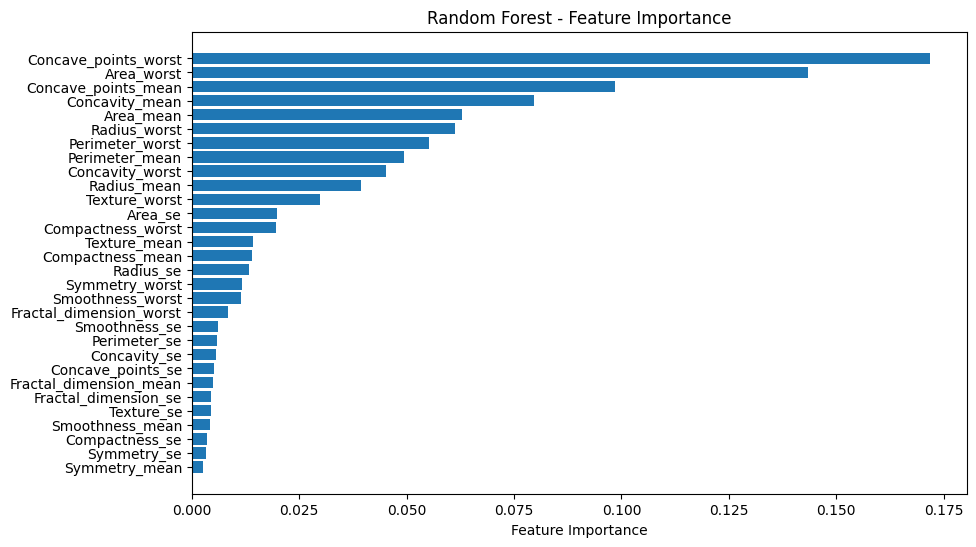

In [60]:
# Feature Importance for Decision Tree / Random Forest:
def plot_feature_importance(model, model_name, feature_names):
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
        indices = importance.argsort()

        plt.figure(figsize=(10, 6))
        plt.title(f"{model_name} - Feature Importance")
        plt.barh(range(len(importance)), importance[indices], align='center')
        plt.yticks(range(len(importance)), [feature_names[i] for i in indices])
        plt.xlabel("Feature Importance")
        plt.show()

# Call this function for Random Forest or Decision Tree
plot_feature_importance(rf_model, "Random Forest", columns[2:])  # Excluding ID and Diagnosis


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


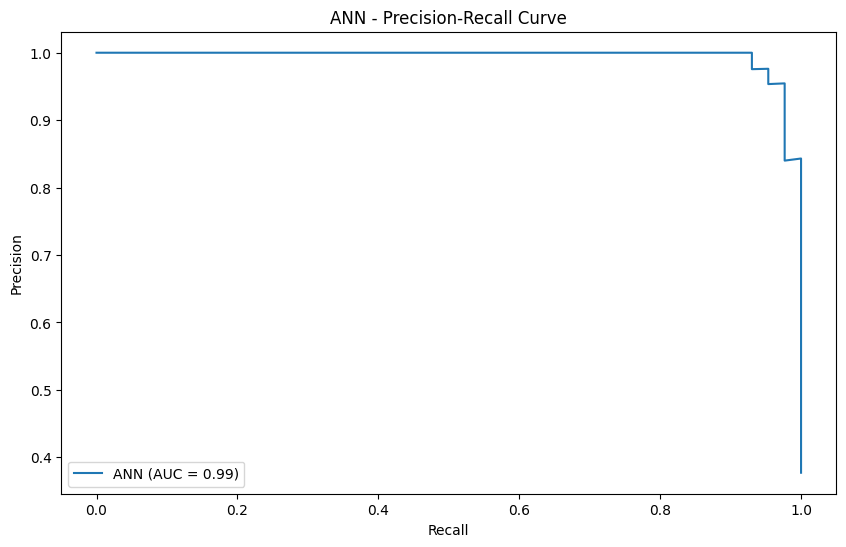

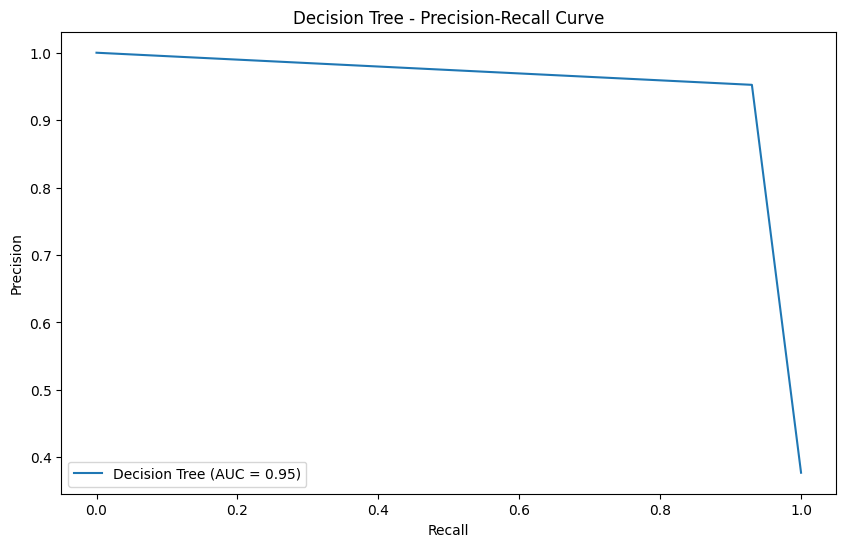

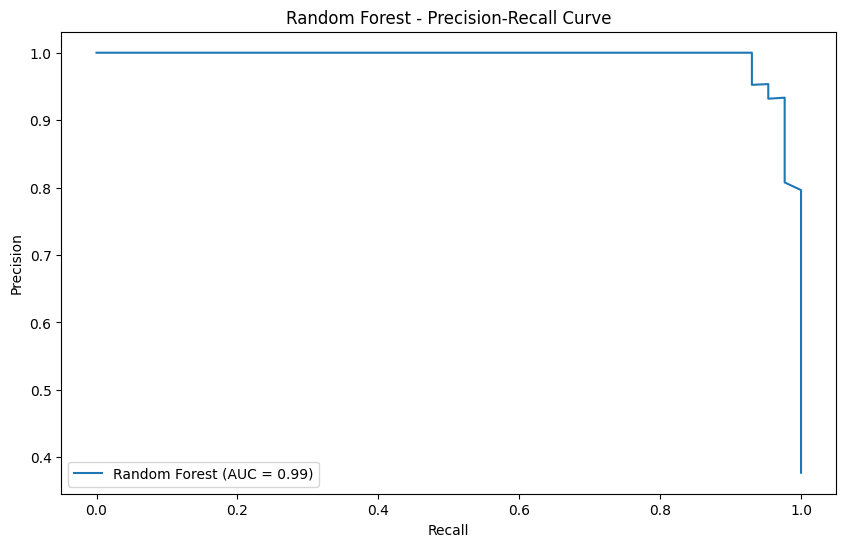

In [61]:
#Precision-Recall Curve:
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall_curve(model, X_test, y_test, model_name):
    # For ANN, use model.predict() to get probabilities
    if hasattr(model, "predict_proba"):  # For tree-based models like RandomForest, DecisionTree
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:  # For ANN, use predict() to get probabilities
        y_pred_prob = model.predict(X_test).flatten()

    # Calculate Precision-Recall curve and AUC for the precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)  # AUC for Precision-Recall curve

    # Plotting Precision-Recall curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, label=f"{model_name} (AUC = {pr_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} - Precision-Recall Curve")
    plt.legend(loc="lower left")
    plt.show()

# Evaluate Precision-Recall Curve for each model
plot_precision_recall_curve(ann_model, X_test, y_test, "ANN")
plot_precision_recall_curve(dt_model, X_test, y_test, "Decision Tree")
plot_precision_recall_curve(rf_model, X_test, y_test, "Random Forest")




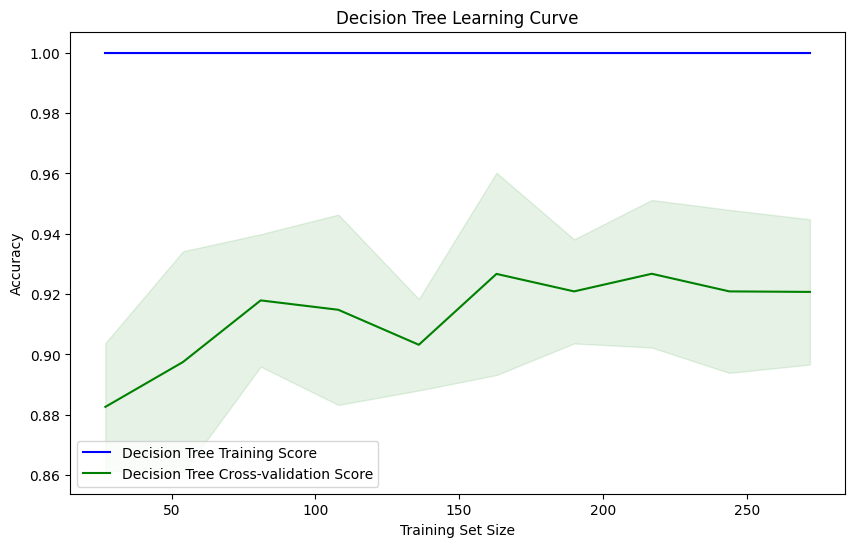

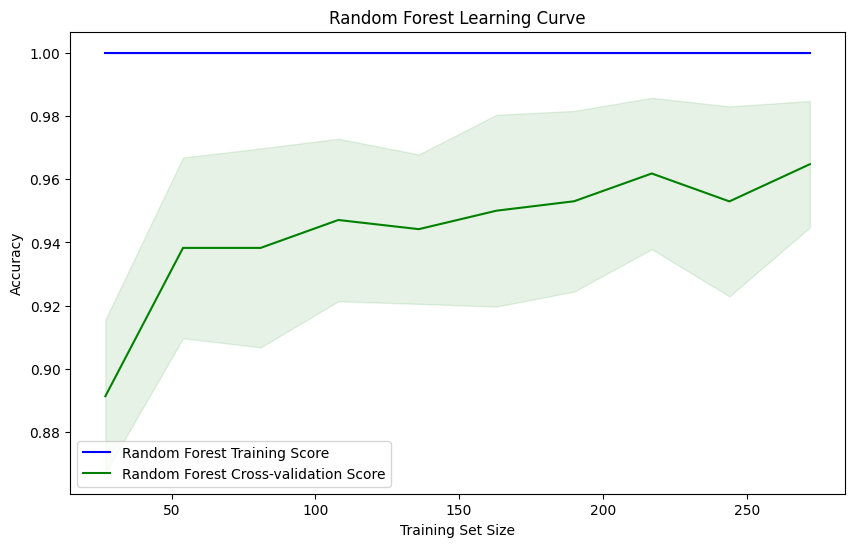

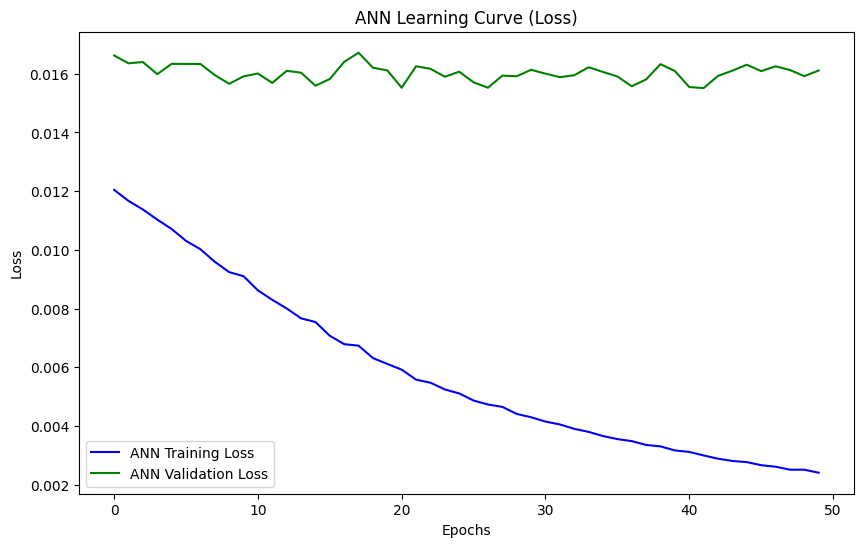

In [62]:
#Learning Curves:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Function to plot learning curve for tree-based models (Decision Tree and Random Forest)
def plot_learning_curve_sklearn(model, X_train, y_train, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate the mean and standard deviation of training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label=f"{model_name} Training Score", color="blue")
    plt.plot(train_sizes, test_mean, label=f"{model_name} Cross-validation Score", color="green")

    # Plot the fill between standard deviations
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")

    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title(f"{model_name} Learning Curve")
    plt.legend(loc="best")
    plt.show()

# Function to plot learning curve for ANN model (using Keras)
def plot_learning_curve_ann(model, X_train, y_train, model_name, batch_size=32, epochs=50):
    # Train the model using validation_data to track learning progress
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=0)

    # Plot the learning curves (training and validation loss)
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label=f'{model_name} Training Loss', color="blue")
    plt.plot(history.history['val_loss'], label=f'{model_name} Validation Loss', color="green")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{model_name} Learning Curve (Loss)")
    plt.legend(loc="best")
    plt.show()

# Plot learning curves for each model
plot_learning_curve_sklearn(dt_model, X_train, y_train, "Decision Tree")
plot_learning_curve_sklearn(rf_model, X_train, y_train, "Random Forest")
plot_learning_curve_ann(ann_model, X_train, y_train, "ANN")



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

ANN - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ANN - F1-Score: 0.9655
ANN - AUC-ROC Score: 0.9974

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Decision Tree - F1-Score: 0.9412
Decision Tree - AUC-ROC Score: 0.9510

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.

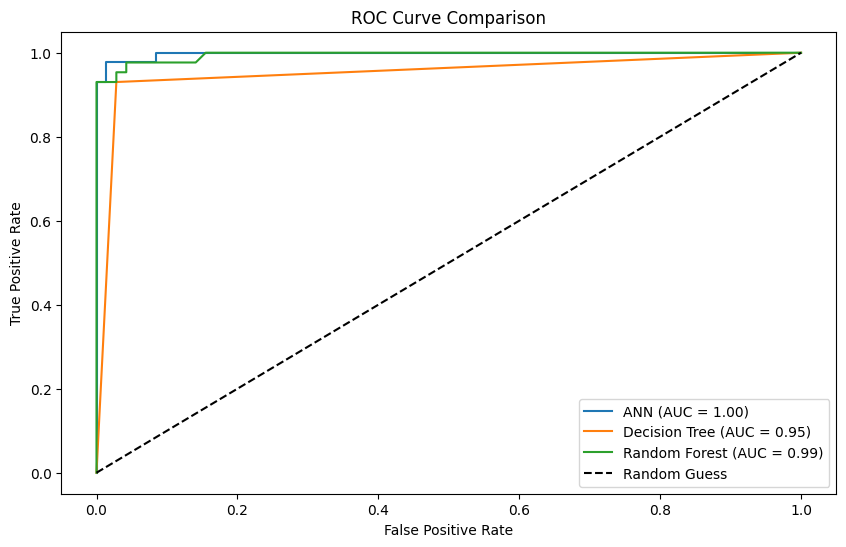

In [67]:
#Evaluating the models

# Evaluating the models

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt

# Define a function to evaluate the models
def evaluate_model(model, X_test, y_test, model_name):
    # Predict probabilities and threshold to get binary class labels
    if hasattr(model, "predict_proba"):  # For DecisionTree and RandomForest
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_prob > 0.5).astype(int)
    else:  # For ANN, predict returns probabilities directly
        y_pred_prob = model.predict(X_test).flatten()
        y_pred = (y_pred_prob > 0.5).astype(int)

    # Classification report
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    # F1-score computation
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name} - F1-Score: {f1:.4f}")

    # AUC-ROC score
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print(f"{model_name} - AUC-ROC Score: {auc_score:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))

# Evaluate ANN
evaluate_model(ann_model, X_test, y_test, "ANN")

# Evaluate Decision Tree
evaluate_model(dt_model, X_test, y_test, "Decision Tree")

# Evaluate Random Forest
evaluate_model(rf_model, X_test, y_test, "Random Forest")

# Finalize ROC curve plot
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
